<a href="https://colab.research.google.com/github/jeonggunlee/CUDATeaching/blob/master/03_numba_vectorize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install numba

In [3]:
from numba import jit
from numpy import arange

# jit decorator tells Numba to compile this function.
# The argument types will be inferred by Numba when function is called.
@jit
def sum2d(arr):
    M, N = arr.shape
    result = 0.0
    for i in range(M):
        for j in range(N):
            result += arr[i,j]
    return result

a = arange(9).reshape(3,3)
print(sum2d(a))

# [출력 결과]
# 36.0

36.0


0.22704317800003082


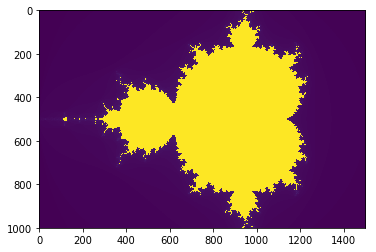

In [5]:
from __future__ import print_function, division, absolute_import

from timeit import default_timer as timer
from matplotlib.pylab import imshow, jet, show, ion
import numpy as np

from numba import jit


@jit
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return 255

@jit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

image = np.zeros((500 * 2, 750 * 2), dtype=np.uint8)
s = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
e = timer()
print(e - s)
imshow(image)
# jet()
# ion()
show()


In [0]:
!export NUMBAPRO_NVVM=/usr/local/cuda-10.1/nvvm/lib64/libnvvm.so
!export NUMBAPRO_LIBDEVICE=/usr/local/cuda-10.1/nvvm/libdevice/

In [22]:
import numpy as np
from timeit import default_timer as timer
from numba import vectorize
 
# This should be a substantially high value. On my test machine, this took
# 33 seconds to run via the CPU and just over 3 seconds on the GPU.
NUM_ELEMENTS = 100000000
 
# This is the CPU version.
def vector_add_cpu(a, b):
  c = np.zeros(NUM_ELEMENTS, dtype=np.float32)
  for i in range(NUM_ELEMENTS):
    c[i] = a[i] + b[i]
  return c
 
# This is the GPU version. Note the @vectorize decorator. This tells
# numba to turn this into a GPU vectorized function.
@vectorize(["float32(float32, float32)"], target='cuda')
def vector_add_gpu(a, b):
  return a + b;
 
def main():
  a_source = np.ones(NUM_ELEMENTS, dtype=np.float32)
  b_source = np.ones(NUM_ELEMENTS, dtype=np.float32)
 
  # Time the CPU function
  start = timer()
  vector_add_cpu(a_source, b_source)
  vector_add_cpu_time = timer() - start
 
  # Time the GPU function
  start = timer()
  vector_add_gpu(a_source, b_source)
  vector_add_gpu_time = timer() - start
 
  # Report times
  print("CPU function took %f seconds." % vector_add_cpu_time)
  print("GPU function took %f seconds." % vector_add_gpu_time)
 
  return 0
 
if __name__ == "__main__":
  main()


NvvmSupportError: ignored

In [21]:
!LANG=C apt search cuda-toolkit

Sorting... Done
Full Text Search... Done
cuda-toolkit-10-0/unknown,now 10.0.130-1 amd64 [installed,automatic]
  CUDA Toolkit 10.0 meta-package

cuda-toolkit-10-1/unknown 10.1.168-1 amd64
  CUDA Toolkit 10.1 meta-package

nvidia-cuda-toolkit/bionic 9.1.85-3ubuntu1 amd64
  NVIDIA CUDA development toolkit

